In [1]:
# imports
import random 
import numpy 
import math
import pandas as pd
import matplotlib.pyplot as plt
import time
from itertools import permutations
import sys, heapq
from itertools import chain

## Maximizing a 3 variable function
Find f(x,y,z) of the equation with constraints 0 <= x,y,z <= 5

In [2]:
# function that is used to determine the fitness value given x y and z
# returns fitness value
def f(x,y,z):
    f = math.exp(math.sin(40*z)) + math.sin(60*math.cos(z)) + math.exp(math.sin(50*x)) + math.sin(60*math.exp(y)) + math.sin(70*math.sin(x)) + math.sin(math.sin(80*y)) - math.sin(10*(x+y)) +(x**2+y**2+z**2)/100
    return f
# function that takes in amount of steps, lower bound and upper bound
# generate random x, y, z in the bounds given and determines the fitness of this
# replaces the current fitness value with the new randomly generated one if it is greater
# returns the best x, y, z and fitness value after the amount of steps given
# or if the best x, y,z and fitness values hasn't changed for a while (this case 5% of total steps taken.)
def randomSearch3(steps=10000, lowerxyz=0, upperxyz=5):
    # define a variable that caps the amount of iterations if the value does not change
    changecap = int(steps * 0.05)
    # define a variable that counts the amount of changes done for a new best f
    changecounter = 0
    # make new random values for x, y and z as a base case
    xb = random.uniform(lowerxyz,upperxyz)
    yb = random.uniform(lowerxyz,upperxyz)
    zb = random.uniform(lowerxyz, upperxyz)
    # finds the fitness for the base case
    fbest = f(xb,yb, zb)
    # loop to make new x,y,z values and to test new fitness value
    for i in range(1,steps):
        # generate new x,y,z values to be tested
        xn = random.uniform(lowerxyz,upperxyz)
        yn = random.uniform(lowerxyz,upperxyz)
        zn = random.uniform(lowerxyz, upperxyz)
        # generate new fitness value from new x,y,z values
        fnew = f(xn,yn,zn)
        # replace the current x,y,z and fitness values if the new one is greater
        if fnew > fbest:
            xb = xn
            yb = yn
            zb = zn
            fbest = fnew
            # reset the change counter because a change has been made
            changecounter = 0
        # add 1 to the change counter to account for each iteration
        changecounter += 1
        # checks if the change counter has passed the cap of iterations without change
        if changecounter > changecap:
            # early return to save on time in case no changes have been made in a while
            return xb, yb, zb, fbest
    # return best x,y,z and fitness
    return xb, yb, zb, fbest
# function that takes in amount of steps, lower bound, upper bound and a set step size
# produce base case random variables and get it's fitness value
# make new variables by making some random change to the current best variables and get the fitness of the new variables
# if the new fitness value is greater than the current one, replace the current variables and fitness value
# with the new variables and fitness value generated
# returns the best x, y, z and fitness value gotten after the amount of steps given
# or if the best x, y,z and fitness values hasn't changed for a while (this case 5% of total steps taken.)
def hillClimb3(steps=10000, lowerxyz = 0, upperxyz = 5, step_size=0.1):
    # define a variable that caps the amount of iterations if the value does not change
    changecap = int(steps * 0.05)
    # define a variable that counts the amount of changes done for a new best f
    changecounter = 0
    # make new random values for x, y and z as a base case
    xb = random.uniform(lowerxyz, upperxyz)
    yb = random.uniform(lowerxyz, upperxyz)
    zb = random.uniform(lowerxyz, upperxyz)
    # finds the fitness for the base case
    fbest = f(xb,yb,zb)
    # loop to make new x,y,z values and to test new fitness value
    for i in range(1,steps):
        # generate new x, y and z variables by making a random change to the current best fitness values
        xn = xb + random.gauss(0,step_size)
        yn = yb + random.gauss(0,step_size)
        zn = zb + random.gauss(0,step_size)
        # check if the newly generated variables are still in the constraint
        # if they are not, set them back to the best value gotten so far
        if xn > upperxyz or xn < lowerxyz:
            xn = xb
        if yn > upperxyz or yn < lowerxyz:
            yn = yb
        if zn > upperxyz or zn < lowerxyz:
            zn = zb
        # after ensuring constraints are met, generate a new fitness value
        fnew = f(xn,yn,zn)
        # replace the current x,y,z and fitness values if the new one is greater
        if fnew > fbest:
            xb = xn
            yb = yn
            zb = zn
            fbest = fnew
            # reset the change counter because a change has been made
            changecounter = 0
        # add 1 to the change counter to account for each iteration
        changecounter += 1
        # checks if the change counter has passed the cap of iterations without change
        if changecounter > changecap:
            # early return to save on time in case no changes have been made in a while
            return xb, yb, zb, fbest
    # return best x,y,z and fitness    
    return xb, yb, zb, fbest
# ils3 takes in the amount of steps, the lower and upper bounds, a small step size and a larger step size
# then after making a optimal variable and fitness, performs a hill climb with small step size
# after this hill climb completes, performs a big step size and restarts a hill climb with the small step size
# this continues until all of the big steps are performed
# returns the optimal x, y, z and fitness value
def ils3(steps=1000, lowerxyz=0, upperxyz=5, small_step_size=0.05, big_step_size=0.2):
    # Determining the amount of big and small steps to take
    # These ratios can be adjusted if needed
    small_steps = int(0.9 * steps)
    big_steps = int(0.1 * steps)
    
    # Create a random initial solution to be current overall optimal solution.
    xopt = random.uniform(lowerxyz, upperxyz)
    yopt = random.uniform(lowerxyz, upperxyz)
    zopt = random.uniform(lowerxyz, upperxyz)
    # Evaluate the fitness of the initial solution
    fopt = f(xopt,yopt,zopt)
    
    # Set current best solution equal to overall optimal solution
    xbest = xopt
    ybest = yopt
    zbest = zopt
    fbest = fopt
 
    # Outer loop for ILS (Determines when to take a large step)
    for i in range(1,big_steps):
        # Inner loop for Standard Hill Climb (Where the small steps are taken) 
        for i in range(1,small_steps):
            # Generate a new solution
            xnew = xbest + random.gauss(0,small_step_size)
            ynew = ybest + random.gauss(0,small_step_size)
            znew = zbest + random.gauss(0,small_step_size)
            # Check if new solutions are still in constraint, if not set them to previous best solution.
            if xnew > upperxyz or xnew < lowerxyz:
                xnew = xbest
            if ynew > upperxyz or ynew < lowerxyz:
                ynew = ybest
            if znew > upperxyz or znew < lowerxyz:
                znew = zbest
            # Evaluate the new solution
            fnew = f(xnew, ynew, znew)
            # Check if new solution is better than best solution, if so update best solution
            if fnew > fbest:
                xbest = xnew
                ybest = ynew
                zbest = znew
                fbest = fnew
        # Check best solution against overall optimal solution, if so update optimal solution
        if fbest > fopt:
            xopt = xbest
            yopt = ybest
            zopt = zbest
            fopt = fbest
        # Carry out a big step after one set of small steps are completed
        xbest = xopt + random.gauss(0,big_step_size)
        ybest = yopt + random.gauss(0,big_step_size)
        zbest = zopt + random.gauss(0,big_step_size)
        # Check if new solutions are still in constraint, if not set them to previous best solution
        if xbest > upperxyz or xbest < lowerxyz:
            xbest = xopt
        if ybest > upperxyz or ybest < lowerxyz:
            ybest = yopt
        if zbest > upperxyz or zbest < lowerxyz:
            zbest = zopt
        
    # Return the best optimal solutions found for x, y, z and fitness value.
    return xopt, yopt, zopt, fopt
# SimAnneal takes in the amount of steps, the lower and upper bounds, the step size and a scalar
# after generating an initial solution, perform a hill climb where some times
# the algorithm takes a worse solution in hope to find a better solution further in the hill climb
# returns the best x, y, z and fitness value found
def simAnneal3(steps=10000, lowerxyz=0, upperxyz=5, step_size=0.1, temp_scalar=10):
    # Generate initial solution
    xbest = random.uniform(lowerxyz, upperxyz)
    ybest = random.uniform(lowerxyz, upperxyz)
    zbest = random.uniform(lowerxyz, upperxyz)
    # Evaluate the fitness of the solution
    fbest = f(xbest, ybest, zbest)
    # Performs a hill climb for the number of steps
    for i in range(1,steps):
        #Tempertaure function that changes with steps,
        # This is used to determine wether a less optimal solution gets accepted or not.
        T=temp_scalar*(1-i/steps)
        # Generate new solution based on previous solution
        xnew = xbest + random.gauss(0,step_size)
        ynew = ybest + random.gauss(0,step_size)
        znew = zbest + random.gauss(0,step_size)
        # Check if new solutions are still in constraint, if not set them to previous best solution.
        if xnew > upperxyz or xnew < lowerxyz:
            xnew = xbest
        if ynew > upperxyz or ynew < lowerxyz:
            ynew = ybest
        if znew > upperxyz or znew < lowerxyz:
            znew = zbest
        # Evaluate the fitness of the new solution
        fnew = f(xnew, ynew, znew)
        # If the new solution is better than the current best, replace the current best with the better solution
        if fnew > fbest:
            xbest = xnew
            ybest = ynew
            zbest = znew
            fbest = fnew
        # If a random number generated is less than the temperature result, accept the worst solution
        elif random.random() < math.exp((fnew-fbest)/T):
            xbest = xnew
            ybest = ynew
            zbest = znew
            fbest = fnew
 
    # return the best x, y, z, and fitness value found.
    return xbest, ybest, zbest, fbest
# genAlg3 takes in the amount of steps, lower and upper bounds, the probability of crossover happening,
# probability of a mutation happening, and the mutation step size
# create an initial population of solutions, from these make children by crossing over 2 values of the initial population
# or make children by taking one parent and mutate it a bit and keep this new child
# do this for all population values and evaluate all of the new population created
# keep the best of the children and parents
# repeat this process for many generations
# return the best x, y, z and fitness value found
def genAlg3(steps=1000, lowerxyz=0, upperxyz=5, crossover_prob=0.5, mutation_probability = 0.2, mutation_size = 0.1):
    # defines population size and generations based on steps
    population_size=int(0.9 * steps)
    n_generations=int(0.1 * steps)
    # Creating the initial population with each parent having 3 variables
    pop = numpy.random.uniform(low=lowerxyz, high=upperxyz, size=(population_size, 3))
 
    # Run the algorithm for the amount of generations
    for gen in range(n_generations):
        # Evaluate fitness (function) for each current solution in population
        fitness_values = numpy.array([f(*ind) for ind in pop])
 
        # Gives current best solution
        best_ind = pop[numpy.argmax(fitness_values)]
     
        # Make space for all the children
        all_children = numpy.zeros((population_size, 3))
        # Run Crossover and Mutation for population size
        for i in range(population_size):
            # Randomly Select parents
            parent1, parent2 = numpy.random.choice(pop.shape[0], size=2, replace=False)
            # Initialize an empty child
            child = numpy.zeros(3)
         
            # Crossover block
            for j in range(2):
                # Apply crossover if probability is greater than random number
                if random.random() <= crossover_prob:
                    # Crossover in this case is average of both parents
                    child[j] = 0.5 * (pop[parent1, j] + pop[parent2, j])
                else:
                    # Set child to a parent
                    child[j] = pop[parent1, j]
       
            # Mutation block
            for j in range(2):
                # Apply a Mutation if probability is greater than random number
                if random.random() <= mutation_probability:
                    # Mutation takes the child and makes a small change to them
                    child[j] = child[j] + random.gauss(0, mutation_size)
                    # Account for bounds in case
                    child[j] = numpy.clip(child[j], lowerxyz, upperxyz)
                # Set the created child in the list of all children
                all_children[i] = child
 
        # Evaluate fitness values for each current child in population
        child_fitness_values = numpy.array([f(*ind) for ind in all_children])
 
        # Combines population of parents and children, and takes the best ones
        combined_pop = numpy.vstack((pop, all_children))
        combined_fitness_values = numpy.concatenate((fitness_values, child_fitness_values))
        sorted_indices = numpy.argsort(combined_fitness_values)[::-1][:population_size]
        # Takes the best half from the population and sets it to the new population
        pop = combined_pop[sorted_indices]
        # Set the return values to the best x, y, z and fitness value
        answer = best_ind[0], best_ind[1], best_ind[2], fitness_values.max()
        # return the best child/parent from population
        return answer

Random search gives us: 


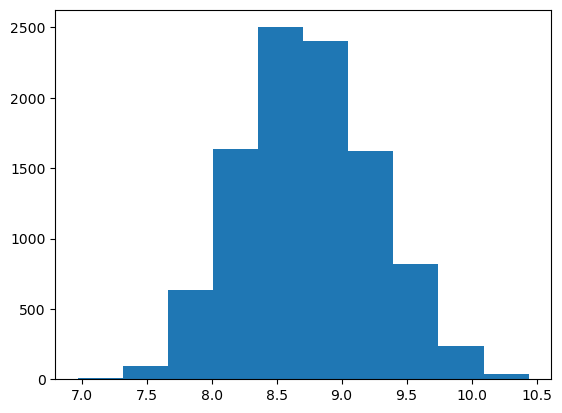

In [3]:
# perform the random search algorithm 10000 times with base case of 10000 steps
# at worst case this algorithm will run for 10000 * 10000 = 100000000 iterations
# put the results of each algortihm run in a list
iterations = 10000
# make a list to keep the best results
bestlist = []
# run the algorithm iteration amount of times
for i in range(iterations):
    xtemp, ytemp, ztemp, ftemp = randomSearch3()
    bestlist.append((xtemp,ytemp,ztemp, ftemp))
# create a list to store the best values in order
randommaxlist = []
# get the best tuple and add it to the max list, then remove it from the best list
for i in range(iterations):
    maxpair = max(bestlist, key=lambda item: item[-1])
    randommaxlist.append(maxpair)
    bestlist.remove(maxpair)
# plot the list of walks and see how consistent it is
flist = []
print("Random search gives us: ")
for i in randommaxlist:
    flist.append(i[-1])
plt.hist(flist)
plt.show()

In [4]:
# print the top 10 from the random search
print(randommaxlist[0:10])

[(3.676806095717266, 3.71301968620773, 4.747251709345464, 10.43956114182392), (4.425234291153841, 4.261562888678011, 2.0861527790551175, 10.350665532057418), (4.047080777093737, 4.022613053538756, 4.747336669980955, 10.322844214157039), (4.42624007310671, 4.183382623174744, 2.0897750633056056, 10.301096664817516), (2.543567668219078, 3.5495246999309615, 2.709815610472797, 10.300391694436382), (4.4374990975824105, 4.805916588189627, 1.7628727395199335, 10.299574032776691), (4.057243134712671, 3.3241876325368214, 4.741318337884545, 10.273403194049486), (3.2965351997417223, 2.8450406765120735, 1.758892857442822, 10.270170038004752), (3.296288498399912, 2.845140776639342, 2.080356364782025, 10.262047027047325), (4.436831302561633, 3.5643307346225854, 4.746610186821984, 10.248911884847756)]


Hill Climb gives us: 


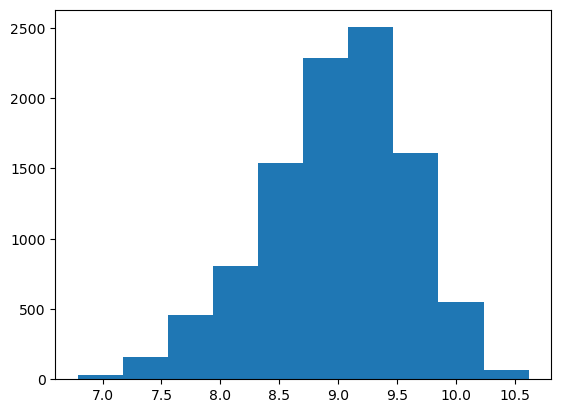

In [5]:
# perform the hill climb algorithm 10000 times with base case of 10000 steps
# at worst case this algorithm will run for 10000 * 10000 = 100000000 iterations
# put the results of each run in a list
iterations = 10000
bestlist = []
for i in range(iterations):
    xtemp, ytemp, ztemp, ftemp = hillClimb3()
    bestlist.append((xtemp,ytemp,ztemp, ftemp))
# sort the list of results 
hillmaxlist = []
for i in range(iterations):
    maxpair = max(bestlist, key=lambda item: item[-1])
    hillmaxlist.append(maxpair)
    bestlist.remove(maxpair)
# plot the list of runs and see how consistent it is
flist = []
print("Hill Climb gives us: ")
for i in hillmaxlist:
    flist.append(i[-1])
plt.hist(flist)
plt.show()

In [6]:
# print the top 10 from the hill climb algorithm
print(hillmaxlist[0:10])

[(3.6772267273422643, 4.96626754668021, 4.744465258887172, 10.61514344608478), (4.428487950899923, 4.811080879391829, 2.086087056540178, 10.55150421823152), (4.936620950448777, 4.969924646318895, 4.7462951808828935, 10.512586783122156), (3.6804911205635147, 4.96262850181891, 0.9863193471145454, 10.472290548803137), (4.428535077204384, 4.807633249193905, 4.738867868540301, 10.467491053236094), (1.1623340233104678, 4.965566225673503, 2.716418902895278, 10.433866160934262), (4.427599207099786, 4.188065294507253, 2.0826703561704814, 10.416515068811623), (3.297976328909462, 4.099978334888765, 0.9863798531079794, 10.410075016672998), (1.1662911854083209, 4.966306044695445, 2.7083523562458214, 10.394497784222331), (4.9307918930352805, 4.969904355311478, 2.0838059590207583, 10.390901959405632)]


ILS gives us: 


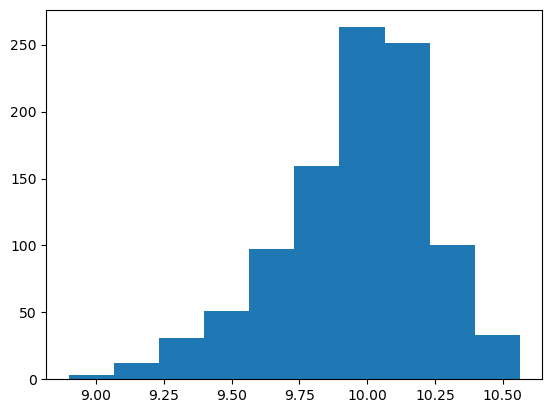

In [7]:
# perform the ILS algorithm 1000 times with base case of 1000 steps
# worst case this algorithm will run 1000 * 900 * 100 = 90000000 iterations
# put the results of each run in a list
iterations = 1000
bestlist = []
for i in range(iterations):
    xtemp, ytemp, ztemp, ftemp = ils3()
    bestlist.append((xtemp,ytemp,ztemp, ftemp))
# sort the list of results 
ilsmaxlist = []
for i in range(iterations):
    maxpair = max(bestlist, key=lambda item: item[-1])
    ilsmaxlist.append(maxpair)
    bestlist.remove(maxpair)
# plot the list of runs and see how consistent it is
flist = []
print("ILS gives us: ")
for i in ilsmaxlist:
    flist.append(i[-1])
plt.hist(flist)
plt.show()

In [8]:
# print the top 10 from the ILS algorithm
print(ilsmaxlist[0:10])

[(4.434123266625133, 4.812771509687727, 4.750380554791666, 10.562733208329751), (4.42954396651946, 3.5523816608437744, 4.74689052318301, 10.551939562473946), (3.6790661314310023, 4.335496297835324, 4.744693964703885, 10.52031706883435), (3.676861744283299, 4.966332365737343, 4.74720452616297, 10.518419062152736), (3.2992328797432564, 4.7367952066163825, 4.750578509460287, 10.505460327193015), (4.4330941711323435, 4.8127570471277625, 0.5142519994662821, 10.489691380127788), (4.428041012068114, 4.8833886224266045, 4.741553227019406, 10.485738581191784), (4.049575927130483, 3.3204999654826066, 4.7416541030599975, 10.478044119159051), (4.4292063305845355, 4.176924066850035, 4.749480771699519, 10.47711323283501), (1.1612763902255776, 4.968454635218825, 0.9855721525432315, 10.473548573190131)]


Simulated Annealing gives us: 


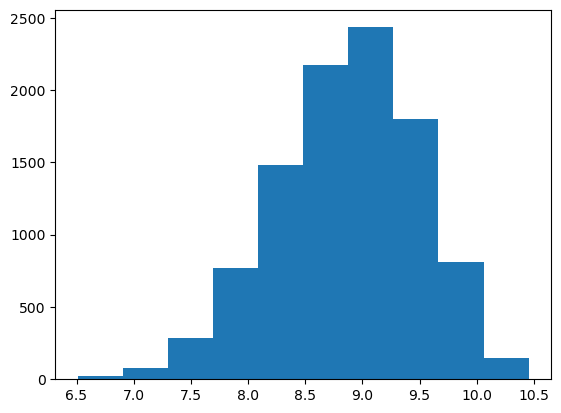

In [9]:
# perform the simulated annealing algorithm 10000 times with base case of 10000 steps
# at worst case this algorithm will run for 10000 * 10000 = 100000000 iterations
# put the results of each run in a list
iterations = 10000
bestlist = []
for i in range(iterations):
    xtemp, ytemp, ztemp, ftemp = simAnneal3()
    bestlist.append((xtemp,ytemp,ztemp, ftemp))
# sort the list of results 
simmaxlist = []
for i in range(iterations):
    maxpair = max(bestlist, key=lambda item: item[-1])
    simmaxlist.append(maxpair)
    bestlist.remove(maxpair)
# plot the list of runs and see how consistent it is
flist = []
print("Simulated Annealing gives us: ")
for i in simmaxlist:
    flist.append(i[-1])
plt.hist(flist)
plt.show()

In [10]:
# print the top 10 from the Sim Anneal algorithm
print(simmaxlist[0:10])

[(2.547231572234336, 4.807652127626656, 2.0850027748865934, 10.454671894694181), (1.16280257463794, 4.962678115207239, 4.745124720857035, 10.439117171474354), (4.427384729583215, 4.8865625201036575, 4.432458345427098, 10.417304277855816), (3.8003063440063434, 4.887343773502625, 4.740336226625365, 10.402756576379156), (1.1638770660364781, 4.966231524697695, 0.9833039249884791, 10.398349016593617), (4.057493628739393, 3.3166734271322706, 4.745152962222644, 10.380482773142086), (4.422742761912666, 4.888172046665589, 4.74551086557389, 10.380040634340814), (4.930341177485682, 4.964787738116581, 4.750499735157338, 10.375801035692934), (4.424059242593984, 3.552309218474671, 4.746816922976178, 10.365564520119406), (3.7973292529399716, 4.810147667777078, 4.74043788038516, 10.36226545959247)]


Gen Alg gives us: 


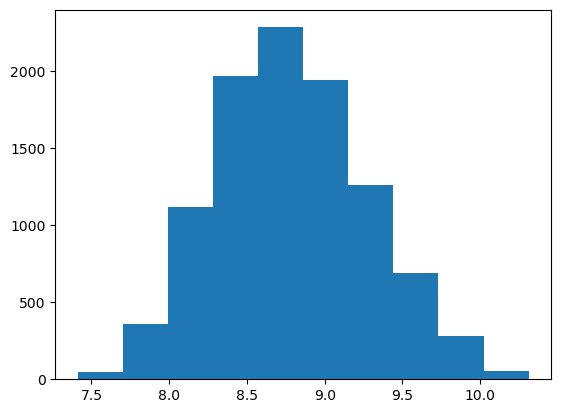

In [12]:
# perform the genetic algorithm 10000 times with base case of 10000 steps
# worst case this algorithm will run 1000 * 900 * 100 = 90000000 iterations
# put the results of each run in a list
iterations = 10000
bestlist = []
for i in range(iterations):
    xtemp, ytemp, ztemp, ftemp = genAlg3()
    bestlist.append((xtemp,ytemp,ztemp, ftemp))
# sort the list of results 
genmaxlist = []
for i in range(iterations):
    maxpair = max(bestlist, key=lambda item: item[-1])
    genmaxlist.append(maxpair)
    bestlist.remove(maxpair)
# plot the list of runs and see how consistent it is
flist = []
print("Gen Alg gives us: ")
for i in genmaxlist:
    flist.append(i[-1])
plt.hist(flist)
plt.show()

In [13]:
# print the top 10 from the genetic algorithm
print(genmaxlist[0:10])

[(3.678411675739819, 4.339695910138388, 1.7665828774583932, 10.311553395644548), (4.434346137476519, 4.191198131752146, 2.7157508815888476, 10.310719476133508), (3.6775359266573493, 4.336835525977538, 4.7540264289589, 10.246860107081304), (4.422159143016798, 4.811958546068511, 4.429560228617108, 10.233361879846607), (3.795481917503793, 3.0021342174675363, 2.71403945921832, 10.219577985922523), (3.9239367469150426, 4.730259062432913, 4.75174221493539, 10.218886762362837), (3.8017774321649855, 4.188144122102468, 0.5108087102925046, 10.204817601761244), (3.2987938046062264, 3.4745899974208965, 0.9761346049139435, 10.19987352923698), (3.7970929171152887, 4.8912041311127625, 0.9847488622639322, 10.195910491514505), (3.2975186160618852, 2.223886274840574, 1.7652989659142064, 10.191784436427366)]


In [18]:
# get all values gathered so far and put them in a list
totallist1 = [item for sublist in zip(randommaxlist, hillmaxlist, ilsmaxlist, simmaxlist, genmaxlist) for item in sublist]
# sort the list
totallist1.sort(key=lambda item: item[-1], reverse = True)
# set the current total list to the first list (used to not lose data)
totallist = totallist1
# print top 30 from the best gathered results from the first generations of algorithms
print(totallist1[0:30])

[(3.6772267273422643, 4.96626754668021, 4.744465258887172, 10.61514344608478), (4.434123266625133, 4.812771509687727, 4.750380554791666, 10.562733208329751), (4.42954396651946, 3.5523816608437744, 4.74689052318301, 10.551939562473946), (4.428487950899923, 4.811080879391829, 2.086087056540178, 10.55150421823152), (3.6790661314310023, 4.335496297835324, 4.744693964703885, 10.52031706883435), (3.676861744283299, 4.966332365737343, 4.74720452616297, 10.518419062152736), (4.936620950448777, 4.969924646318895, 4.7462951808828935, 10.512586783122156), (3.2992328797432564, 4.7367952066163825, 4.750578509460287, 10.505460327193015), (4.4330941711323435, 4.8127570471277625, 0.5142519994662821, 10.489691380127788), (4.428041012068114, 4.8833886224266045, 4.741553227019406, 10.485738581191784), (4.049575927130483, 3.3204999654826066, 4.7416541030599975, 10.478044119159051), (4.4292063305845355, 4.176924066850035, 4.749480771699519, 10.47711323283501), (1.1612763902255776, 4.968454635218825, 0.9855

In [19]:
# take the top 1% of all results and keep them for next generation of testing
accepted = int(0.01 * len(totallist))
# show how many were kept
print(accepted)
# set a new list to determine the bounds for next generation
newtotal = totallist[0:accepted]
# print the kept list
print(newtotal)

50
[(3.6772267273422643, 4.96626754668021, 4.744465258887172, 10.61514344608478), (4.434123266625133, 4.812771509687727, 4.750380554791666, 10.562733208329751), (4.42954396651946, 3.5523816608437744, 4.74689052318301, 10.551939562473946), (4.428487950899923, 4.811080879391829, 2.086087056540178, 10.55150421823152), (3.6790661314310023, 4.335496297835324, 4.744693964703885, 10.52031706883435), (3.676861744283299, 4.966332365737343, 4.74720452616297, 10.518419062152736), (4.936620950448777, 4.969924646318895, 4.7462951808828935, 10.512586783122156), (3.2992328797432564, 4.7367952066163825, 4.750578509460287, 10.505460327193015), (4.4330941711323435, 4.8127570471277625, 0.5142519994662821, 10.489691380127788), (4.428041012068114, 4.8833886224266045, 4.741553227019406, 10.485738581191784), (4.049575927130483, 3.3204999654826066, 4.7416541030599975, 10.478044119159051), (4.4292063305845355, 4.176924066850035, 4.749480771699519, 10.47711323283501), (1.1612763902255776, 4.968454635218825, 0.9

Best result so far from all 5 tested algorithms:
(3.6772267273422643, 4.96626754668021, 4.744465258887172, 10.61514344608478)
Acquired from Hill Climb Algorithm

In [20]:
# find lowest and highest values of x, y and z an make those into the bounds
zip(*newtotal)
# find minimum and maximums for each values in the tuples in the list
mins = map(min, zip(*newtotal))
maxs = map(max, zip(*newtotal))
# save all the bounds as a list
allbounds = list(mins), list(maxs)
# determine each variables bound by extracting them from the list above
xbound = allbounds[0][0], allbounds[1][0]
ybound = allbounds[0][1], allbounds[1][1]
zbound = allbounds[0][2], allbounds[1][2]
# display the new bounds for next generation
print(f"Bounds for x: {xbound} \n Bounds for y: {ybound} \n Bounds for z: {zbound} \n")


Bounds for x: (1.1612763902255776, 4.936620950448777) 
 Bounds for y: (2.6868321554379526, 4.969924646318895) 
 Bounds for z: (0.5139418912723328, 4.750578509460287) 



In [57]:
# fitgenAlg3 takes the amount of steps, the bounds for each variables, crossover probability
# mutation probability and mutation size
# runs the genetic algorithm using the fitted bounds passed in
# the variables are treated individually from here on out
# returns the best x, y, z and fitness value
def fitgenAlg3(steps=1000, lowerx=0, upperx=5, lowery=0, uppery=5, lowerz=0, upperz=5, crossover_prob=0.5, mutation_probability = 0.2, mutation_size = 0.1):
    population_size=int(0.9 * steps)
    n_generations=int(0.1 * steps)
    # Creating the initial population
    xpop = numpy.random.uniform(low=lowerx, high=upperx, size=(population_size, 1))
    ypop = numpy.random.uniform(low=lowery, high=uppery, size=(population_size, 1))
    zpop = numpy.random.uniform(low=lowerz, high=upperz, size=(population_size, 1))
    
    pop = numpy.zeros(shape=(population_size,3))
    for i in range(population_size):
        pop[i] = (xpop.item(i), ypop.item(i), zpop.item(i))
    # Run the algorithm
    for gen in range(n_generations):
        # Evaluate fitness (function) for each current solution in population
        fitness_values = numpy.array([f(*ind) for ind in pop])
 
        # Gives current best solution and prints it
        best_ind = pop[numpy.argmax(fitness_values)]
     
        # Apply crossover and mutation to produce the child
        all_children = numpy.zeros((population_size, 3))
        for i in range(population_size):
            # (Randomly) Select parents
            parent1, parent2 = numpy.random.choice(pop.shape[0], size=2, replace=False)
            child = numpy.zeros(3)
         
            # Crossover - child is average of two parents, e.g. (x1+x2)/2
            for j in range(2):
                if random.random() <= crossover_prob:
                    child[j] = 0.5 * (pop[parent1, j] + pop[parent2, j])
                else:
                    child[j] = pop[parent1, j]
       
            # Mutation (equivalent to a hill-climb step, fixing any movement outside bounds)
            for j in range(2):
                if random.random() <= mutation_probability:
                    child[j] = child[j] + random.gauss(0, mutation_size)
                    if j == 0:
                        child[j] = numpy.clip(child[j], lowerx, upperx)
                    elif j == 1:
                        child[j] = numpy.clip(child[j], lowery, uppery)
                    else:
                        child[j] = numpy.clip(child[j], lowerz, upperz)
                all_children[i] = child
 
        # Evaluate fitness (function) for each current solution in population
        child_fitness_values = numpy.array([f(*ind) for ind in all_children])
 
        # Combines population of parents and children, and takes the best ones
        combined_pop = numpy.vstack((pop, all_children))
        combined_fitness_values = numpy.concatenate((fitness_values, child_fitness_values))
        sorted_indices = numpy.argsort(combined_fitness_values)[::-1][:population_size]
        pop = combined_pop[sorted_indices]
        answer = best_ind[0], best_ind[1], best_ind[2], fitness_values.max()
        return answer
# fitils3 takes in the amount of steps, the lower and upper bounds for each variable, a small step size and a larger step size
# then does an iterative local search on the fitted range for the given amount of steps
# the variables are treated individually from here on out
# returns the best x, y, z and fitness value
def fitils3(steps=1000, lowerx=0, upperx=5, lowery=0, uppery=5, lowerz=0, upperz=5, small_step_size=0.005, big_step_size=0.02):
    # Determining the amount of big and small steps to take
    small_steps = int(0.9 * steps)
    big_steps = int(0.1 * steps)
    
    # Create a random initial solution to be current overall optimal solution.
    xopt = random.uniform(lowerx, upperx)
    yopt = random.uniform(lowery, uppery)
    zopt = random.uniform(lowerz, upperz)
    # Evaluate the initial solution
    fopt = f(xopt,yopt,zopt)
    
    # Set current best solution equal to overall optimal solution
    xbest = xopt
    ybest = yopt
    zbest = zopt
    fbest = fopt
 
    # Outer loop for ILS
    for i in range(1,big_steps):
     
        # Inner loop for Standard Hill Climb  
        for i in range(1,small_steps):
            # Generate a new solution
            xnew = xbest + random.gauss(0,small_step_size)
            ynew = ybest + random.gauss(0,small_step_size)
            znew = zbest + random.gauss(0,small_step_size)
            # Check if new solutions are still in constraint, if not set them to previous best solution.
            if xnew > upperx or xnew < lowerx:
                xnew = xbest
            if ynew > uppery or ynew < lowery:
                ynew = ybest
            if znew > upperz or znew < lowerz:
                znew = zbest
            # Evaluate the new solution
            fnew = f(xnew, ynew, znew)
            # Check if new solution is better than best solution, if so update best solution
            if fnew > fbest:
                xbest = xnew
                ybest = ynew
                zbest = znew
                fbest = fnew
        # Check best solution against overall optimal solution, if so update optimal solution
        if fbest > fopt:
            xopt = xbest
            yopt = ybest
            zopt = zbest
            fopt = fbest
        # Carry out a big step
        xbest = xopt + random.gauss(0,big_step_size)
        ybest = yopt + random.gauss(0,big_step_size)
        zbest = zopt + random.gauss(0,big_step_size)
        # Check if new solutions are still in constraint, if not set them to previous best solution
        if xbest > upperx or xbest < lowerx:
            xbest = xopt
        if ybest > uppery or ybest < lowery:
            ybest = yopt
        if zbest > upperz or zbest < lowerz:
            zbest = zopt
        
    # Return the best optimal solutions found.
    return xopt, yopt, zopt, fopt
# fitsimAnneal takes in the amount of steps, the lower and upper bounds for each variable, the step size and a scalar
# Performs a simulated annealing algorithm on the fitted range to find the best solution
# the variables are treated individually from here on out
# returns the best x, y, z and fitness value found
def fitsimAnneal3(steps=10000, lowerx=0, upperx=5,lowery=0, uppery=5,lowerz=0, upperz=5, step_size=0.05, temp_scalar=10):
    # Create initial solution
    xbest = random.uniform(lowerx, upperx)
    ybest = random.uniform(lowery, uppery)
    zbest = random.uniform(lowerz, upperz)
    # Evaluate initial solution
    fbest = f(xbest, ybest, zbest)
    # Repeat this process for the amount of steps
    for i in range(1,steps):
        # Calculate the temperature using the scalar
        T=temp_scalar*(1-i/steps)
        # Generate new solution
        xnew = xbest + random.gauss(0,step_size)
        ynew = ybest + random.gauss(0,step_size)
        znew = zbest + random.gauss(0,step_size)
        # Check if new solutions are still in constraint, if not set them to previous best solution.
        if xnew > upperx or xnew < lowerx:
            xnew = xbest
        if ynew > uppery or ynew < lowery:
            ynew = ybest
        if znew > upperz or znew < lowerz:
            znew = zbest
        # Evaluate new solution
        fnew = f(xnew, ynew, znew)
        # Keep the best value if it has a greater fitness
        if fnew > fbest:
            xbest = xnew
            ybest = ynew
            zbest = znew
            fbest = fnew
        # Chance of keeping a worst solution
        elif random.random() < math.exp((fnew-fbest)/T):
            xbest = xnew
            ybest = ynew
            zbest = znew
            fbest = fnew
    # Return the best x, y, z and fitness
    return xbest, ybest, zbest, fbest

Gen Alg gives us: 


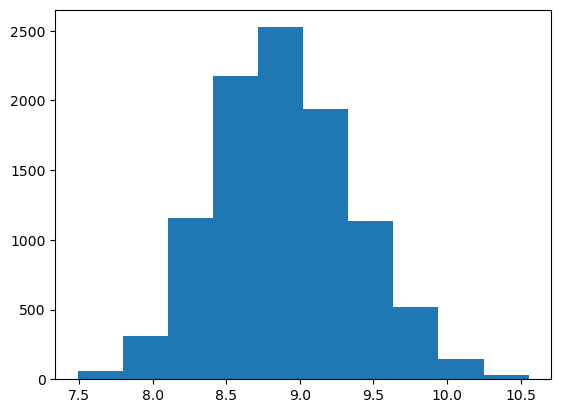

In [22]:
# perform the fitted genetic algorithm 10000 times with base case of 10000 steps
# worst case this algorithm will run 10000 * 900 * 100 = 900000000 iterations
# put the results of each run in a list
iterations = 10000
bestlist = []
for i in range(iterations):
    xtemp, ytemp, ztemp, ftemp = fitgenAlg3(lowerx=xbound[0], upperx=xbound[1], lowery=ybound[0], uppery=ybound[1], lowerz=zbound[0], upperz=zbound[1])
    bestlist.append((xtemp,ytemp,ztemp, ftemp))
# sort the list of results 
fitgenmaxlist = []
for i in range(iterations):
    maxpair = max(bestlist, key=lambda item: item[-1])
    fitgenmaxlist.append(maxpair)
    bestlist.remove(maxpair)
# plot the list of runs and see how consistent it is
flist = []
print("Gen Alg gives us: ")
for i in fitgenmaxlist:
    flist.append(i[-1])
plt.hist(flist)
plt.show()

In [23]:
# print the top 10 from the fitted Genetic algorithm
print(fitgenmaxlist[0:10])

[(4.049888430220994, 4.573615973552249, 4.740751848112291, 10.55366299617113), (3.3006192276299497, 4.738670658478618, 4.744064044022055, 10.441526707166009), (3.6798958804515527, 4.336977723692003, 0.9854235708330303, 10.433023798322623), (3.297194163957241, 4.094813948491861, 4.745106309150502, 10.424994160166888), (3.7970465024964173, 3.5584305472549795, 4.747926178508054, 10.422928087791995), (2.5450904483128225, 4.811920122905639, 2.090195126426004, 10.412919550890647), (4.050440107254996, 3.944599055617563, 4.737983069503029, 10.375577176412921), (3.297810257077273, 4.110383230037199, 2.0856870100806786, 10.374061122610613), (3.8035214274545543, 4.805915436438665, 4.749208630701549, 10.37361340497096), (4.431535041923155, 4.173682552603353, 2.7150094053582063, 10.339296886190883)]


ILS gives us: 


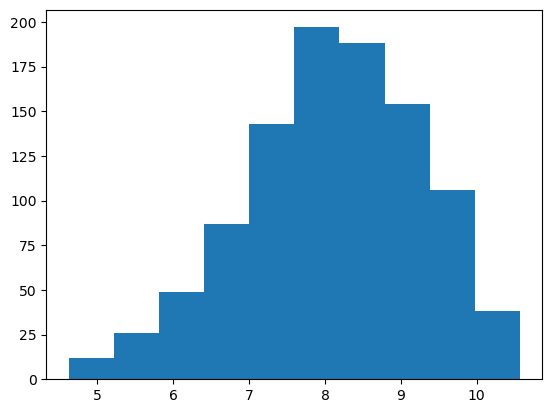

In [24]:
# perform the ILS algorithm 1000 times with base case of 1000 steps
# worst case this algorithm will run 1000 * 900 * 100 = 90000000 iterations
# put the results of each run in a list
iterations = 1000
bestlist = []
for i in range(iterations):
    xtemp, ytemp, ztemp, ftemp = fitils3(lowerx=xbound[0], upperx=xbound[1], lowery=ybound[0], uppery=ybound[1], lowerz=zbound[0], upperz=zbound[1])
    bestlist.append((xtemp,ytemp,ztemp, ftemp))
# sort the list of results 
fitilsmaxlist = []
for i in range(iterations):
    maxpair = max(bestlist, key=lambda item: item[-1])
    fitilsmaxlist.append(maxpair)
    bestlist.remove(maxpair)
# plot the list of runs and see how consistent it is
flist = []
print("ILS gives us: ")
for i in fitilsmaxlist:
    flist.append(i[-1])
plt.hist(flist)
plt.show()

In [25]:
# print the top 10 from the fitted ILS algorithm
print(fitilsmaxlist[0:10])

[(4.431237536488602, 4.811062924379455, 2.083239492479558, 10.567689348453877), (3.2981629857504955, 3.474401258110002, 4.7440441785438825, 10.531358767891751), (2.545623356809045, 4.887353865977106, 4.746682980839742, 10.504548205754219), (3.798704148831848, 4.811921824609705, 0.9852318191066443, 10.494803844314527), (4.050416444432509, 3.320367176636552, 2.7129261712241153, 10.456308107490905), (4.430445544898509, 4.258617472254194, 2.714339288764469, 10.434984778520274), (4.431584816429448, 2.9266899708573786, 2.0841566216527907, 10.42935429681033), (4.051725957595233, 3.944577065997081, 1.7612701144217549, 10.42198550940805), (3.2980934154282515, 2.8448495090476245, 2.7110276098901345, 10.405317336487537), (3.3007816820257156, 4.6555198896575405, 0.9836536136244723, 10.39870396116402)]


Simulated Annealing gives us: 


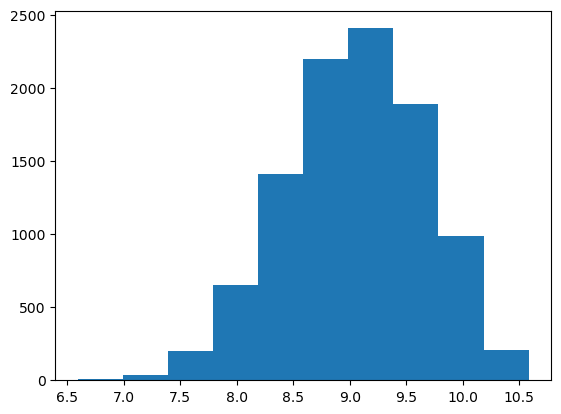

In [27]:
# perform the simulated annealing algorithm 10000 times with base case of 10000 steps
# at worst case this algorithm will run for 10000 * 10000 = 100000000 iterations
# put the results of each run in a list
iterations = 10000
bestlist = []
for i in range(iterations):
    xtemp, ytemp, ztemp, ftemp = fitsimAnneal3(lowerx=xbound[0], upperx=xbound[1], lowery=ybound[0], uppery=ybound[1], lowerz=zbound[0], upperz=zbound[1])
    bestlist.append((xtemp,ytemp,ztemp, ftemp))
# sort the list of results 
fitsimmaxlist = []
for i in range(iterations):
    maxpair = max(bestlist, key=lambda item: item[-1])
    fitsimmaxlist.append(maxpair)
    bestlist.remove(maxpair)
# plot the list of runs and see how consistent it is
flist = []
print("Simulated Annealing gives us: ")
for i in fitsimmaxlist:
    flist.append(i[-1])
plt.hist(flist)
plt.show()

In [28]:
# print the top 10 from the fitted Sim Anneal algorithm
print(fitsimmaxlist[0:10])

[(4.430700732235293, 4.80770190536546, 4.746993976743159, 10.5818079303894), (3.29864043162981, 4.1069927204672085, 4.745861686454687, 10.568614923758567), (4.4325937156161235, 4.888940356486867, 4.745930837513267, 10.560005491414863), (4.435250370027976, 4.186465444080443, 4.744798917199862, 10.53171640769417), (4.935223459499211, 4.964082162423607, 4.743465692395884, 10.504207966606801), (3.2984949437137994, 4.738589122466818, 4.741892701291951, 10.491676474593023), (4.429933081407541, 4.891253685512854, 4.749651564558195, 10.481144547120799), (2.169703693044422, 4.572552900614006, 4.748611107533787, 10.463261771045785), (3.7990220911348387, 4.258618791346996, 4.746610829381012, 10.46191659341228), (2.5450617993234803, 4.806854881851256, 4.744775444966347, 10.460556264359282)]


In [54]:
# get all values gathered from all algorithms and put them in a list
totallist2 = [item for sublist in zip(fitilsmaxlist, fitgenmaxlist, fitsimmaxlist) for item in sublist]
# sort the list
totallist2.sort(key=lambda item: item[-1], reverse = True)
# combine the results with the previous results
totallist = totallist1 + totallist2
# sort the total list of results
totallist.sort(key=lambda i: i[-1], reverse= True)
# take the top 10 of all results and keep them to determine the new bounds
accepted = 10
newtotal = totallist[0:accepted]
print(newtotal)
# find lowest and highest values of x, y and z to determine the bound
zip(*newtotal)
mins = map(min, zip(*newtotal))
maxs = map(max, zip(*newtotal))
allbounds = list(mins), list(maxs)
# set the bounds
xbound = allbounds[0][0], allbounds[1][0]
ybound = allbounds[0][1], allbounds[1][1]
zbound = allbounds[0][2], allbounds[1][2]
# in case upper bound is overfitted, we add a scalar to the current bount
xbound = xbound[0], xbound[1] + 0.01
ybound = ybound[0], ybound[1] + 0.01
zbound = zbound[0], zbound[1] + 0.01

print(f"Bounds for x: {xbound} \n Bounds for y: {ybound} \n Bounds for z: {zbound} \n")

[(3.6772267273422643, 4.96626754668021, 4.744465258887172, 10.61514344608478), (4.430700732235293, 4.80770190536546, 4.746993976743159, 10.5818079303894), (4.430700732235293, 4.80770190536546, 4.746993976743159, 10.5818079303894), (4.430700732235293, 4.80770190536546, 4.746993976743159, 10.5818079303894), (3.29864043162981, 4.1069927204672085, 4.745861686454687, 10.568614923758567), (3.29864043162981, 4.1069927204672085, 4.745861686454687, 10.568614923758567), (3.29864043162981, 4.1069927204672085, 4.745861686454687, 10.568614923758567), (4.431237536488602, 4.811062924379455, 2.083239492479558, 10.567689348453877), (4.431237536488602, 4.811062924379455, 2.083239492479558, 10.567689348453877), (4.431237536488602, 4.811062924379455, 2.083239492479558, 10.567689348453877)]
Bounds for x: (3.29864043162981, 4.441237536488602) 
 Bounds for y: (4.1069927204672085, 4.9762675466802095) 
 Bounds for z: (2.083239492479558, 4.756993976743159) 



Best Result so far:
(3.6772267273422643, 4.96626754668021, 4.744465258887172, 10.61514344608478)
From the previous run

Gen Alg gives us: 


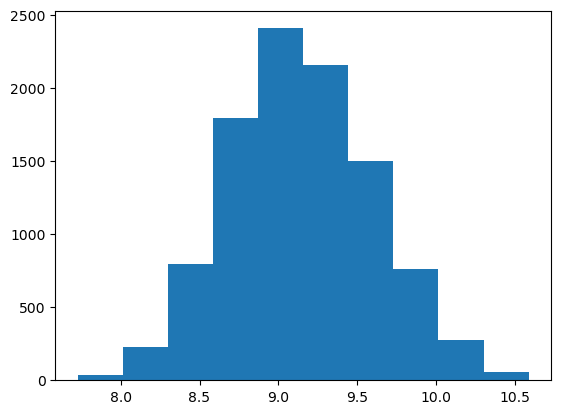

In [55]:
# perform the genetic algorithm 10000 times with base case of 10000 steps
# worst case this algorithm will run 10000 * 900 * 100 = 900000000 iterations
# put the results of each run in a list
iterations = 10000
bestlist = []
for i in range(iterations):
    xtemp, ytemp, ztemp, ftemp = fitgenAlg3(lowerx=xbound[0], upperx=xbound[1], lowery=ybound[0], uppery=ybound[1], lowerz=zbound[0], upperz=zbound[1])
    bestlist.append((xtemp,ytemp,ztemp, ftemp))
# sort the list of results 
fit2genmaxlist = []
for i in range(iterations):
    maxpair = max(bestlist, key=lambda item: item[-1])
    fit2genmaxlist.append(maxpair)
    bestlist.remove(maxpair)
# plot the list of runs and see how consistent it is
flist = []
print("Gen Alg gives us: ")
for i in fit2genmaxlist:
    flist.append(i[-1])
plt.hist(flist)
plt.show()

In [56]:
# print the top 10 from the fitted Genetic algorithm
print(fit2genmaxlist[0:10])

[(4.431926186586977, 4.806793607384736, 4.749551267044742, 10.58909014236815), (4.4315234054828565, 4.808452445178257, 4.747463487899365, 10.581170505441667), (3.6798259914365166, 4.964802779165561, 4.748430835067065, 10.578336189011246), (3.301941862074573, 4.7340204793865786, 4.748805686358576, 10.546431278438932), (4.051073239424175, 4.58325395990458, 4.745470931626091, 10.52475693553782), (3.6806497817699655, 4.960422875826318, 4.747787446796687, 10.503246088484081), (4.430363123434558, 4.811032996631061, 2.089577204177335, 10.48874101851031), (4.431652880262087, 4.811003399705012, 2.7132360824479664, 10.484584870618102), (3.3010989828884583, 4.73311416762686, 2.7082034540512483, 10.48320246174953), (4.429277287055767, 4.17846228801979, 2.0859312008277584, 10.473470741330035)]


ILS gives us: 


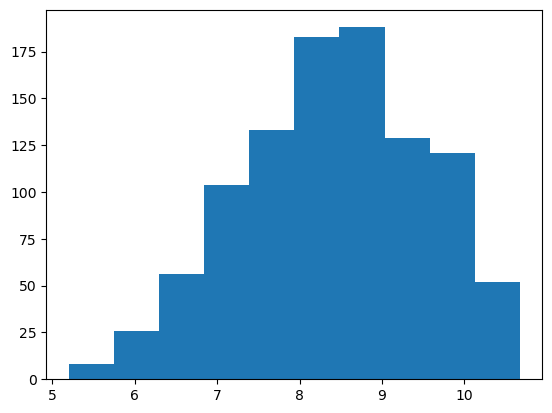

In [58]:
# perform the ILS algorithm 1000 times with base case of 1000 steps
# worst case this algorithm will run 1000 * 900 * 100 = 90000000 iterations
# put the results of each run in a list
iterations = 1000
accepted = int(0.1 * iterations)
bestlist = []
for i in range(iterations):
    xtemp, ytemp, ztemp, ftemp = fitils3(lowerx=xbound[0], upperx=xbound[1], lowery=ybound[0], uppery=ybound[1], lowerz=zbound[0], upperz=zbound[1],small_step_size=0.005, big_step_size=0.02)
    bestlist.append((xtemp,ytemp,ztemp, ftemp))
# sort the list of results 
fit2ilsmaxlist = []
for i in range(iterations):
    maxpair = max(bestlist, key=lambda item: item[-1])
    fit2ilsmaxlist.append(maxpair)
    bestlist.remove(maxpair)
# plot the list of runs and see how consistent it is
flist = []
print("ILS gives us: ")
for i in fit2ilsmaxlist:
    flist.append(i[-1])
plt.hist(flist)
plt.show()

In [59]:
# print the top 10 from the fitted ILS algorithm
print(fit2ilsmaxlist[0:10])

[(4.432268895976592, 4.811921102602805, 4.745458501028399, 10.673957467810844), (4.429371752796622, 4.886565765903206, 4.745181675037025, 10.58996719964195), (4.431330850591677, 4.81192415888383, 2.710285825595309, 10.583010686304371), (4.430564198763783, 4.811065701177706, 2.7100477456074192, 10.583000833758403), (3.6775761170075936, 4.338286474797775, 4.74393219023003, 10.562650820763553), (4.430485903486747, 4.1832891567739, 2.713233335736909, 10.532155363327199), (4.4299687829446, 4.181686978179758, 2.711963812225255, 10.530427936042624), (3.7996629270144733, 4.183243645974209, 4.744976772910306, 10.51400849654648), (4.43042509986088, 4.888144751005189, 2.7126571422429375, 10.50331832921706), (3.299360768163312, 4.656518797271064, 4.745356985685963, 10.495892922727137)]


Simulated Annealing gives us: 


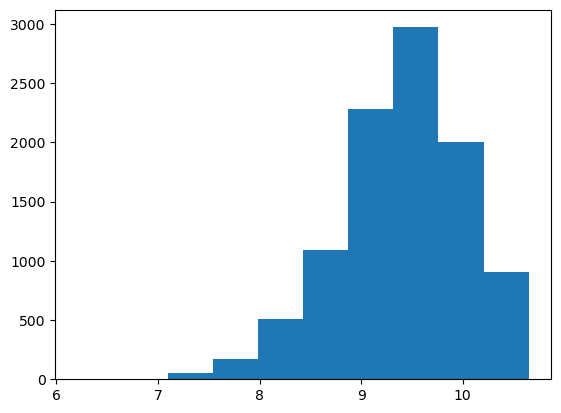

In [60]:
# perform the simulated annealing algorithm 10000 times with base case of 10000 steps
# at worst case this algorithm will run for 10000 * 10000 = 100000000 iterations
# put the results of each run in a list
iterations = 10000
bestlist = []
for i in range(iterations):
    xtemp, ytemp, ztemp, ftemp = fitsimAnneal3(lowerx=xbound[0], upperx=xbound[1], lowery=ybound[0], uppery=ybound[1], lowerz=zbound[0], upperz=zbound[1])
    bestlist.append((xtemp,ytemp,ztemp, ftemp))
# sort the list of results 
fit2simmaxlist = []
for i in range(iterations):
    maxpair = max(bestlist, key=lambda item: item[-1])
    fit2simmaxlist.append(maxpair)
    bestlist.remove(maxpair)
# plot the list of runs and see how consistent it is
flist = []
print("Simulated Annealing gives us: ")
for i in fit2simmaxlist:
    flist.append(i[-1])
plt.hist(flist)
plt.show()

In [61]:
# print the top 10 from the fitted Sim Anneal algorithm
print(fit2simmaxlist[0:10])

[(4.431844907147777, 4.808481409594284, 4.746149071416805, 10.648883313383207), (4.430036866629316, 4.809359183039953, 4.7431292063067305, 10.64883066008807), (4.43320335550395, 4.811930253263859, 4.747435489838961, 10.647223625921747), (4.432281328421223, 4.8110927577735785, 4.747327006368487, 10.645760087444064), (4.427293005641478, 4.810212348700341, 4.745114890340851, 10.631761250565084), (4.430102077168928, 4.806785820501238, 4.743073752289801, 10.61552173405772), (4.053427881946626, 4.572535563057927, 4.746895970825542, 10.611469895821882), (4.4287574796998666, 4.810187470246163, 4.74241352402446, 10.607458480449546), (3.2989555795386236, 4.735851543905742, 4.744270557266948, 10.60717658215488), (4.427803193019485, 4.8068084483137135, 4.74543662172246, 10.604392885551118)]


In [62]:
# get all values gathered so far and put them in a list
totallist3 = [item for sublist in zip(fit2ilsmaxlist, fit2genmaxlist, fit2simmaxlist) for item in sublist]
# sort the list
totallist3.sort(key=lambda item: item[-1], reverse = True)
totallist = totallist + totallist3
totallist.sort(key=lambda i: i[-1], reverse= True)
# print top 30 from the best gathered results
print(totallist[0:30])
# take the top 10 of all results and keep them to determine the new bounds
accepted = 10
newtotal = totallist[0:accepted]
# find lowest and highest values of x, y and z
zip(*newtotal)
mins = map(min, zip(*newtotal))
maxs = map(max, zip(*newtotal))
allbounds = list(mins), list(maxs)
# set the bounds with an extra scalar added for upper bound
xbound = xbound[0], xbound[1] + 0.001
ybound = ybound[0], ybound[1] + 0.001
zbound = zbound[0], zbound[1] + 0.001
print(f"Bounds for x: {xbound} \n Bounds for y: {ybound} \n Bounds for z: {zbound} \n")

[(4.432268895976592, 4.811921102602805, 4.745458501028399, 10.673957467810844), (4.431844907147777, 4.808481409594284, 4.746149071416805, 10.648883313383207), (4.430036866629316, 4.809359183039953, 4.7431292063067305, 10.64883066008807), (4.43320335550395, 4.811930253263859, 4.747435489838961, 10.647223625921747), (4.432281328421223, 4.8110927577735785, 4.747327006368487, 10.645760087444064), (4.427293005641478, 4.810212348700341, 4.745114890340851, 10.631761250565084), (4.430102077168928, 4.806785820501238, 4.743073752289801, 10.61552173405772), (3.6772267273422643, 4.96626754668021, 4.744465258887172, 10.61514344608478), (4.053427881946626, 4.572535563057927, 4.746895970825542, 10.611469895821882), (4.4287574796998666, 4.810187470246163, 4.74241352402446, 10.607458480449546), (3.2989555795386236, 4.735851543905742, 4.744270557266948, 10.60717658215488), (4.427803193019485, 4.8068084483137135, 4.74543662172246, 10.604392885551118), (4.435559039951216, 4.8119113279508, 4.74459932001305

Result from 3rd generation:
(4.432268895976592, 4.811921102602805, 4.745458501028399, 10.673957467810844)
From ILS

Gen Alg gives us: 


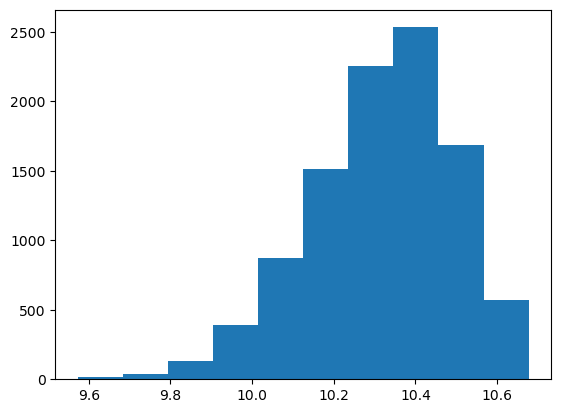

In [64]:
# perform the genetic algorithm 10000 times with base case of 10000 steps
# worst case this algorithm will run 1000 * 900 * 100 = 90000000 iterations
# put the results of each walk in a list
iterations = 10000
bestlist = []
for i in range(iterations):
    xtemp, ytemp, ztemp, ftemp = fitgenAlg3(lowerx=xbound[0], upperx=xbound[1], lowery=ybound[0], uppery=ybound[1], lowerz=zbound[0], upperz=zbound[1], mutation_size = 0.01)
    bestlist.append((xtemp,ytemp,ztemp, ftemp))
# sort the list of results 
fitgenmaxlist = []
for i in range(iterations):
    maxpair = max(bestlist, key=lambda item: item[-1])
    fitgenmaxlist.append(maxpair)
    bestlist.remove(maxpair)
# plot the list of runs and see how consistent it is
flist = []
print("Gen Alg gives us: ")
for i in fitgenmaxlist:
    flist.append(i[-1])
plt.hist(flist)
plt.show()

In [65]:
# print the top 10 from the fitted Genetic algorithm
print(fitgenmaxlist[0:10])

[(4.431322237983405, 4.812771996151586, 4.745948786443192, 10.67718005453427), (4.431253306040056, 4.812763303775942, 4.745694289632371, 10.677127198342054), (4.431279604493124, 4.8119312714362374, 4.746234213894256, 10.674841273059727), (4.429616643335201, 4.81106646957524, 4.744869032200659, 10.673695864834134), (4.430172909408623, 4.811907415012181, 4.746752972703044, 10.673370999882684), (4.43209700926844, 4.810204106019153, 4.746029469872555, 10.672471818448136), (4.432340245349819, 4.811059719361131, 4.746302324543097, 10.672420866285984), (4.431817459895446, 4.8119199510117365, 4.747093736864251, 10.671501250262082), (4.431452361067235, 4.812776904171913, 4.747004423483713, 10.669436378448045), (4.430691056135706, 4.811936841429687, 4.746601287497265, 10.668473343419787)]


ILS gives us: 


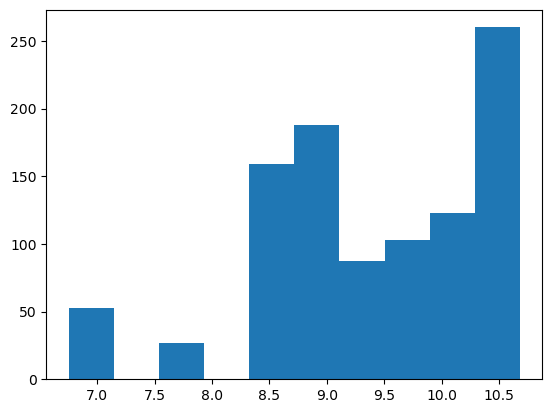

In [66]:
# perform the ILS algorithm 1000 times with base case of 1000 steps
# worst case this algorithm will run 1000 * 900 * 100 = 90000000 iterations
# put the results of each walk in a list
iterations = 1000
bestlist = []
for i in range(iterations):
    xtemp, ytemp, ztemp, ftemp = fitils3(lowerx=xbound[0], upperx=xbound[1], lowery=ybound[0], uppery=ybound[1], lowerz=zbound[0], upperz=zbound[1], small_step_size=0.001, big_step_size=0.01)
    bestlist.append((xtemp,ytemp,ztemp, ftemp))
# sort the list of results 
fitilsmaxlist = []
for i in range(iterations):
    maxpair = max(bestlist, key=lambda item: item[-1])
    fitilsmaxlist.append(maxpair)
    bestlist.remove(maxpair)
# plot the list of runs and see how consistent it is
flist = []
print("ILS gives us: ")
for i in fitilsmaxlist:
    flist.append(i[-1])
plt.hist(flist)
plt.show()

In [67]:
# print the top 10 from the fitted ILS algorithm
print(fitilsmaxlist[0:10])

[(4.430876917754807, 4.811065841389389, 4.745662545725095, 10.68211928313492), (4.430919031138638, 4.811065255835893, 4.745894949292127, 10.682029708164563), (4.4308738744684355, 4.81106692147436, 4.745870035314301, 10.68200698276373), (4.430838458085105, 4.811066444983592, 4.745557672238228, 10.682003672748476), (4.430960166294908, 4.811066562104064, 4.745885263942505, 10.681992905541346), (4.430868159141301, 4.811067615878385, 4.745628422446319, 10.681978145280926), (4.430781563875481, 4.811067611972121, 4.745809229910137, 10.681953322289218), (4.431049203130257, 4.811064445810537, 4.74559314886697, 10.681943380635627), (4.4306236278534294, 4.811066520469483, 4.745749263210507, 10.681866400630696), (4.430789199992018, 4.811068419239635, 4.7458173662674845, 10.68184213403481)]


Simulated Annealing gives us: 


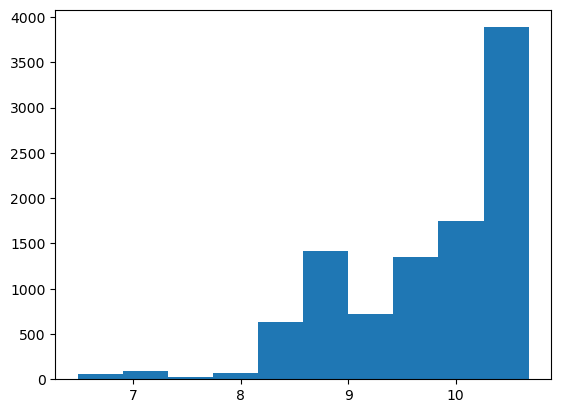

In [68]:
# perform the simulated annealing algorithm 10000 times with base case of 10000 steps
# at worst case this algorithm will run for 10000 * 10000 = 100000000 iterations
# put the results of each walk in a list
iterations = 10000
bestlist = []
for i in range(iterations):
    xtemp, ytemp, ztemp, ftemp = fitsimAnneal3(lowerx=xbound[0], upperx=xbound[1], lowery=ybound[0], uppery=ybound[1], lowerz=zbound[0], upperz=zbound[1], step_size=0.005)
    bestlist.append((xtemp,ytemp,ztemp, ftemp))
# sort the list of results 
fitsimmaxlist = []
for i in range(iterations):
    maxpair = max(bestlist, key=lambda item: item[-1])
    fitsimmaxlist.append(maxpair)
    bestlist.remove(maxpair)
# plot the list of runs and see how consistent it is
flist = []
print("Simulated Annealing gives us: ")
for i in fitsimmaxlist:
    flist.append(i[-1])
plt.hist(flist)
plt.show()

In [69]:
# print the top 10 from the fitted Sim Anneal algorithm
print(fitsimmaxlist[0:10])

[(4.431484892044794, 4.811072822356275, 4.745883532027668, 10.679270050894862), (4.430566093834138, 4.810214993532605, 4.746175904796443, 10.678837688784988), (4.4309679221876435, 4.810205610440832, 4.745627160243497, 10.678600613946713), (4.430831741240517, 4.811066006954955, 4.746732108007675, 10.678498770445753), (4.431401395967379, 4.811070899641851, 4.746530761112724, 10.678046962696662), (4.431041937081886, 4.812766924829635, 4.7453981437455, 10.67787045296517), (4.430284337055057, 4.811074826394435, 4.746184571193828, 10.677723644175249), (4.432182624046958, 4.81106275518489, 4.745728753796583, 10.675859811827356), (4.431000480327603, 4.810225354248081, 4.7459474679767775, 10.67560629652615), (4.42983899358083, 4.8119141787194595, 4.744967942603944, 10.675429556348469)]


In [70]:
# get all values gathered so far and put them in a list
totallist4 = [item for sublist in zip(fitilsmaxlist, fitgenmaxlist, fitsimmaxlist) for item in sublist]
# sort the list
totallist4.sort(key=lambda item: item[-1], reverse = True)
totallist = totallist + totallist4
totallist.sort(key=lambda i: i[-1], reverse= True)
# print top 30 from the best gathered results
print(totallist[0:30])
# take the top 10 of all results and keep them to determine the new bounds
accepted = 10
newtotal = totallist[0:accepted]
# find lowest and highest values of x, y and z
zip(*newtotal)
mins = map(min, zip(*newtotal))
maxs = map(max, zip(*newtotal))
allbounds = list(mins), list(maxs)
xbound = allbounds[0][0], allbounds[1][0]
ybound = allbounds[0][1], allbounds[1][1]
zbound = allbounds[0][2], allbounds[1][2]
# in case upper bound is overfitted
xbound = xbound[0], xbound[1] + 0.0001
ybound = ybound[0], ybound[1] + 0.0001
zbound = zbound[0], zbound[1] + 0.0001
print(f"Bounds for x: {xbound} \n Bounds for y: {ybound} \n Bounds for z: {zbound} \n")

[(4.430876917754807, 4.811065841389389, 4.745662545725095, 10.68211928313492), (4.430919031138638, 4.811065255835893, 4.745894949292127, 10.682029708164563), (4.4308738744684355, 4.81106692147436, 4.745870035314301, 10.68200698276373), (4.430838458085105, 4.811066444983592, 4.745557672238228, 10.682003672748476), (4.430960166294908, 4.811066562104064, 4.745885263942505, 10.681992905541346), (4.430868159141301, 4.811067615878385, 4.745628422446319, 10.681978145280926), (4.430781563875481, 4.811067611972121, 4.745809229910137, 10.681953322289218), (4.431049203130257, 4.811064445810537, 4.74559314886697, 10.681943380635627), (4.4306236278534294, 4.811066520469483, 4.745749263210507, 10.681866400630696), (4.430789199992018, 4.811068419239635, 4.7458173662674845, 10.68184213403481), (4.431074328118211, 4.811063210426312, 4.745812940657737, 10.681836910507865), (4.430640309834132, 4.811067338679997, 4.745779739857919, 10.681823552203507), (4.430817324797749, 4.81106267801898, 4.7459084320515

Result from 4th Generation:
(4.430876917754807, 4.811065841389389, 4.745662545725095, 10.68211928313492)
From ILS